# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import re

# 1_Gathering data

In [2]:
T_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
IP = requests.get(URL)
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(IP.content)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [ ]:
df_1 = []
with open('tweet-json.txt') as file:
    for line in file:
        df_1.append(json.loads(line))

In [5]:
data = pd.DataFrame(df_1, columns = ['id', 'retweet_count', 'favorite_count'])

NameError: name 'df_1' is not defined

In [6]:
data.head()

NameError: name 'data' is not defined

# 2_Assessing Data

# API

In [7]:
data = data.rename(columns = {'id':'tweet_id'})
data.head()

NameError: name 'data' is not defined

In [8]:
data.to_csv('tweet_data.csv', index=False)

NameError: name 'data' is not defined

In [9]:
df_2 = pd.read_csv('tweet_data.csv')
df_2.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Twitter archived data


In [11]:
T_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
T_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
T_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
the              8
Toby             7
Daisy            7
Bailey           7
an               7
Buddy            7
Stanley          6
Jack             6
Oscar            6
Milo             6
Rusty            6
Leo              6
Bella            6
Scout            6
Koda             6
Dave             6
Jax              6
Phil             5
              ... 
Ambrose          1
Monty            1
Shakespeare      1
Coleman          1
Brownie          1
Franq            1
Theo             1
Schnitzel        1
Tess             1
Cheryl           1
Opie             1
Tassy            1
Beemo            1
Ashleigh         1
Jockson          1
Ralf             1
Poppy            1
Bodie            1
Marlee           1
Zeus             1
Frönq            1
Jordy       

In [14]:
T_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [15]:
T_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [16]:
T_archive[T_archive.rating_numerator < 10].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

## Image predictions

In [17]:
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(image_pred['jpg_url'].duplicated())

66

# Tidness issues

1- data is related but added to many DataFrames

2- dog stages are separated into 4 columns

3- dog breed are separated into 3 columns('p1', 'p2', 'p3')


# Twitter archive quality issues

1- dog names has none value and other wrong names 

2- rating denomiantor  has values larger than and smaller than 10

3- rating numerator has Exaggerated values (1776)

4- wrong data type for 'twitter_id'

5- wrong data type for 'timestamp'

6- wrong data type for 'rating_numerator'

7- there are 181 retweets exists as 'retweeted_status_id'and 'retweeted_status_user_id' and 'retweeted_status_timestamp'

8- there are 181 reply exists as 'in_reply_to_status_id' and 'in_reply_to_user_id

# image prediction quality issues

1- missing data (contain only 2075 rows)

2- 66 jpg_url duplicated

3- some of the dog breed ('p1', 'p2', 'p3') start with uppercase and other start with lowercase letters

4- some dog breed('p1', 'p2', 'p3') has underscores and some has space

# API issues

missing data (contain only 2354 rows)


# cleanin data

In [20]:
T_archive_copy = T_archive.copy()
image_pred_copy = image_pred.copy()
df_2_copy = df_2.copy()

In [21]:
T_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_2_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Tidness issue 1
dog stages are separated into 4 columns

### defin
add all dog stages to one columne called 'dog_stage

### code 

In [24]:
T_archive_copy['dog_stage'] = T_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')
T_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [25]:
T_archive_copy = T_archive_copy.drop(columns = ['doggo', 'floofer', 'puppo', 'pupper'])

### test

In [26]:
T_archive_copy.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [27]:
T_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Tidness issue 2
dogs prediction are separated

### defin
add all of them to one column 'dog breed'

### code

In [28]:
dog_breed = []
def breed(image_pred_copy):
    if image_pred_copy['p1_dog'] == True:
        dog_breed.append(image_pred_copy['p1'])
    elif image_pred_copy['p2_dog'] == True:
        dog_breed.append(image_pred_copy['p2'])
    elif image_pred_copy['p3_dog'] == True:
        dog_breed.append(image_pred_copy['p3'])
    else:
        dog_breed.append('Error')

image_pred_copy.apply(breed, axis=1)
image_pred_copy['dog_breed'] = dog_breed

In [29]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
dog_breed    2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [30]:
image_pred_copy = image_pred_copy[image_pred_copy['dog_breed'] != 'Error']

### Test

In [31]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id     1751 non-null int64
jpg_url      1751 non-null object
img_num      1751 non-null int64
p1           1751 non-null object
p1_conf      1751 non-null float64
p1_dog       1751 non-null bool
p2           1751 non-null object
p2_conf      1751 non-null float64
p2_dog       1751 non-null bool
p3           1751 non-null object
p3_conf      1751 non-null float64
p3_dog       1751 non-null bool
dog_breed    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 155.6+ KB


### Tidness issue 3
data is related but added to many DataFrames

### define
add DataFrames into one

### code

In [32]:
T_archive_copy = pd.merge(T_archive_copy, image_pred_copy, on= 'tweet_id', how = 'left'  )
T_archive_copy = pd.merge(T_archive_copy, df_2_copy, on= 'tweet_id', how = 'left'  )

### Test 

In [33]:
T_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,9774.0,41048.0


In [34]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
jpg_url                       1751 non-null object
img_num                       1751 non-null float64
p1                            1751 non-null object
p1_conf                       17

## Twitter archive quality issues

### issue 1
wrong ratings

### define
make all denominators equal 10 and get numeratot true value

### code

In [35]:
true_ratings = T_archive_copy[T_archive_copy.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for rate in true_ratings:
    new = T_archive_copy.text == rate
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    T_archive_copy.loc[new, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", rate)
    T_archive_copy.loc[new, column_name2] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


### Test

In [36]:
T_archive_copy.rating_denominator.value_counts()

10     2340
80        2
50        2
15        1
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
16        1
Name: rating_denominator, dtype: int64

### issue 2
wrong numerators and denominators

### define
fix some of them manually manually

### code

In [37]:
T_archive_copy.loc[(T_archive_copy.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
T_archive_copy.loc[(T_archive_copy.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
T_archive_copy.loc[(T_archive_copy.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
T_archive_copy.loc[(T_archive_copy.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
T_archive_copy.loc[(T_archive_copy.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
T_archive_copy.loc[(T_archive_copy.tweet_id == 740373189193256964), 'rating_numerator'] = 14
T_archive_copy.loc[(T_archive_copy.tweet_id == 740373189193256964), 'rating_denominator'] = 10
T_archive_copy.loc[(T_archive_copy.tweet_id == 682962037429899265), 'rating_numerator'] = 10
T_archive_copy.loc[(T_archive_copy.tweet_id == 682962037429899265), 'rating_denominator'] = 10
T_archive_copy.loc[(T_archive_copy.tweet_id == 666287406224695296), 'rating_numerator'] = 9
T_archive_copy.loc[(T_archive_copy.tweet_id == 722974582966214656), 'rating_numerator'] = 13
T_archive_copy.loc[(T_archive_copy.tweet_id == 722974582966214656), 'rating_denominator'] = 10
T_archive_copy.loc[(T_archive_copy.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
T_archive_copy.loc[(T_archive_copy.tweet_id == 716439118184652801), 'rating_denominator'] = 10
T_archive_copy.loc[(T_archive_copy.tweet_id == 666287406224695296), 'rating_denominator'] = 10
T_archive_copy = T_archive_copy[T_archive_copy['tweet_id'] != 832088576586297345]
T_archive_copy = T_archive_copy[T_archive_copy['tweet_id'] != 810984652412424192]
T_archive_copy = T_archive_copy[T_archive_copy['tweet_id'] != 682808988178739200]
T_archive_copy = T_archive_copy[T_archive_copy['tweet_id'] != 835246439529840640]
T_archive_copy = T_archive_copy[T_archive_copy['tweet_id'] != 686035780142297088]

### issue 3
dog names has none value and other wrong names

### define
get the dog true name from the 'text column after the word 'named'

### code 

In [38]:
T_archive_copy_2 = T_archive_copy.copy()

pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in T_archive_copy_2.iterrows():  
    if len(row['name']) < 3 and row['name'][0].islower():
        print(row['name'])

a
a
an
a
my
a
a
a
an
a
a
a
a
a
a
an
a
a
a
by
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
an
a
a
a
a
a
a
a
a
a
a
a
a
a
an
a
an
a
a
an
a
a
a
a


In [39]:
for index, row in T_archive_copy_2.iterrows():
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            true_name = re.findall(pattern_2, row['text'][0])
            T_archive_copy.loc[index,'name'] = T_archive_copy.loc[index,'name'].replace(row['name'], true_name)
        except:
            T_archive_copy.loc[index,'name'] = np.nan

### Test

In [40]:
T_archive_copy.name.value_counts(dropna=False)

NaN            850
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Lola            10
Tucker          10
Penny           10
Bo               9
Winston          9
Sadie            8
Daisy            7
Bailey           7
Toby             7
Buddy            7
Rusty            6
Leo              6
Bella            6
Stanley          6
Jax              6
Milo             6
Oscar            6
Jack             6
Dave             6
Koda             6
Scout            6
Sunny            5
Louis            5
George           5
Chester          5
              ... 
Godi             1
Hubertson        1
Travis           1
Ambrose          1
Monty            1
Shakespeare      1
Coleman          1
Brownie          1
Franq            1
Stu              1
Mac              1
Lugan            1
Poppy            1
Damon            1
Noosh            1
Opie             1
Beemo            1
Ashleigh         1
Jockson          1
Ralf             1
Bodie            1
Lambeau     

### issue 4
wrong data type for 'twitter_id'

### define
change 'tweet_id' data type into string ( object)

### code

In [41]:
T_archive_copy.tweet_id = T_archive_copy.tweet_id.astype(str)

### Test

In [42]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2351 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2351 non-null object
source                        2351 non-null object
text                          2351 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2351 non-null object
rating_denominator            2351 non-null int64
name                          1501 non-null object
dog_stage                     399 non-null object
jpg_url                       1750 non-null object
img_num                       1750 non-null float64
p1                            1750 non-null object
p1_conf                       

### issue 5
worong data type for'timestamp'

### define 
change 'timestamp' data type into date

### code

In [43]:
T_archive_copy.timestamp = pd.to_datetime(T_archive_copy.timestamp)

### Test

In [44]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2351 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2351 non-null datetime64[ns]
source                        2351 non-null object
text                          2351 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2351 non-null object
rating_denominator            2351 non-null int64
name                          1501 non-null object
dog_stage                     399 non-null object
jpg_url                       1750 non-null object
img_num                       1750 non-null float64
p1                            1750 non-null object
p1_conf               

### issue 6
numerator data type

### defin
covert it into float

### code

In [81]:
T_archive_copy.rating_numerator = T_archive_copy.rating_numerator.astype(float)

### Test

In [82]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 23 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null int64
name                  1185 non-null object
dog_stage             270 non-null object
jpg_url               1665 non-null object
img_num               1665 non-null float64
p1                    1665 non-null object
p1_conf               1665 non-null float64
p1_dog                1665 non-null object
p2                    1665 non-null object
p2_conf               1665 non-null float64
p2_dog                1665 non-null object
p3                    1665 non-null object
p3_conf               1665 non-null float64
p3_dog                1665 non-null object
dog_breed             

### issue 7
there are 181 retweets exists as 'retweeted_status_id'and 'retweeted_status_user_id' and 'retweeted_status_timestamp'

### define 
drop the 181 retweet

### code 

In [45]:
retweets = T_archive_copy.retweeted_status_id.notnull()
T_archive_copy[retweets].shape[0]

181

In [46]:
T_archive_copy = T_archive_copy[~retweets]

### Test

In [47]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2170 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2170 non-null datetime64[ns]
source                        2170 non-null object
text                          2170 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2170 non-null object
rating_denominator            2170 non-null int64
name                          1390 non-null object
dog_stage                     364 non-null object
jpg_url                       1685 non-null object
img_num                       1685 non-null float64
p1                            1685 non-null object
p1_conf                     

In [48]:
T_archive_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [49]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 2170 non-null object
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                2170 non-null datetime64[ns]
source                   2170 non-null object
text                     2170 non-null object
expanded_urls            2116 non-null object
rating_numerator         2170 non-null object
rating_denominator       2170 non-null int64
name                     1390 non-null object
dog_stage                364 non-null object
jpg_url                  1685 non-null object
img_num                  1685 non-null float64
p1                       1685 non-null object
p1_conf                  1685 non-null float64
p1_dog                   1685 non-null object
p2                       1685 non-null object
p2_conf                  1685 non-null float64
p2_dog                   1685 non-null object
p3          

### issue 8
there are 181 reply exists as 'in_reply_to_status_id' and 'in_reply_to_user_id'

### define
drop all of the 181 reply

### code 

In [50]:
replies = T_archive_copy.in_reply_to_status_id.notnull()
T_archive_copy[replies].shape[0]

74

In [51]:
T_archive_copy = T_archive_copy[~replies]

### Test

In [52]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 2096 non-null object
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2096 non-null datetime64[ns]
source                   2096 non-null object
text                     2096 non-null object
expanded_urls            2093 non-null object
rating_numerator         2096 non-null object
rating_denominator       2096 non-null int64
name                     1389 non-null object
dog_stage                353 non-null object
jpg_url                  1665 non-null object
img_num                  1665 non-null float64
p1                       1665 non-null object
p1_conf                  1665 non-null float64
p1_dog                   1665 non-null object
p2                       1665 non-null object
p2_conf                  1665 non-null float64
p2_dog                   1665 non-null object
p3            

In [53]:
T_archive_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

In [54]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null object
rating_denominator    2096 non-null int64
name                  1389 non-null object
dog_stage             353 non-null object
jpg_url               1665 non-null object
img_num               1665 non-null float64
p1                    1665 non-null object
p1_conf               1665 non-null float64
p1_dog                1665 non-null object
p2                    1665 non-null object
p2_conf               1665 non-null float64
p2_dog                1665 non-null object
p3                    1665 non-null object
p3_conf               1665 non-null float64
p3_dog                1665 non-null object
dog_breed             1

## image prediction quality issue

### issue 9
some of the dog breed ('p1', 'p2', 'p3') start with uppercase and other start with lowercas letters

### define 
make all of them start with uppercase letter

### code

In [56]:
T_archive_copy.p1 = T_archive_copy.p1.str.title()
T_archive_copy.p2 = T_archive_copy.p2.str.title()
T_archive_copy.p3 = T_archive_copy.p3.str.title()
T_archive_copy.dog_breed =T_archive_copy.dog_breed.str.title()

### Test

In [57]:
T_archive_copy.p1.head(10)

0                         NaN
1                   Chihuahua
2                   Chihuahua
3                 Paper_Towel
4                      Basset
5    Chesapeake_Bay_Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish_Terrier
9                    Pembroke
Name: p1, dtype: object

In [58]:
T_archive_copy.dog_breed.head()

0                   NaN
1             Chihuahua
2             Chihuahua
3    Labrador_Retriever
4                Basset
Name: dog_breed, dtype: object

### issue 10
some dog breed('p1', 'p2', 'p3') has underscores and some has space

### define 
make all of them spaces

### code

In [60]:
T_archive_copy.p1 = T_archive_copy.p1.str.replace('_', ' ')
T_archive_copy.p2 = T_archive_copy.p2.str.replace('_', ' ')
T_archive_copy.p3 = T_archive_copy.p3.str.replace('_', ' ')
T_archive_copy.dog_breed =T_archive_copy.dog_breed.str.replace('_', " ")

### Test 

In [61]:
T_archive_copy.p1.head()

0            NaN
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

In [62]:
T_archive_copy.p2.head()

0                   NaN
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
Name: p2, dtype: object

In [63]:
T_archive_copy.p3.head()

0                            NaN
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
Name: p3, dtype: object

In [64]:
T_archive_copy.dog_breed.head()

0                   NaN
1             Chihuahua
2             Chihuahua
3    Labrador Retriever
4                Basset
Name: dog_breed, dtype: object

### issue 11
66 duplicated jpg_url

### define 
delete them

### code 

In [65]:
T_archive_copy = T_archive_copy.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [66]:
sum(T_archive_copy['jpg_url'].duplicated())

0

### issue 12
missing data (cotain only 2075 rows)

### define 
done in previous work (removing retweets and replies)

### Test

In [67]:
T_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 23 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null object
rating_denominator    1666 non-null int64
name                  1185 non-null object
dog_stage             270 non-null object
jpg_url               1665 non-null object
img_num               1665 non-null float64
p1                    1665 non-null object
p1_conf               1665 non-null float64
p1_dog                1665 non-null object
p2                    1665 non-null object
p2_conf               1665 non-null float64
p2_dog                1665 non-null object
p3                    1665 non-null object
p3_conf               1665 non-null float64
p3_dog                1665 non-null object
dog_breed             1

### storing data

In [87]:
T_archive_copy.to_csv('twitter_archive_master.csv', index=False)

# visualizations and insights

## visualization 1

In [69]:
T_archive_copy['dog_breed'].value_counts()

Golden Retriever                  155
Labrador Retriever                106
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         50
Chow                               48
Samoyed                            42
Pomeranian                         41
Malamute                           33
French Bulldog                     31
Chesapeake Bay Retriever           31
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Cardigan                           21
Beagle                             20
Siberian Husky                     20
Staffordshire Bullterrier          20
Shih-Tzu                           20
Maltese Dog                        19
Shetland Sheepdog                  18
Rottweiler                         18
Italian Greyhound                  17
Lakeland Terrier                   17
Basset      

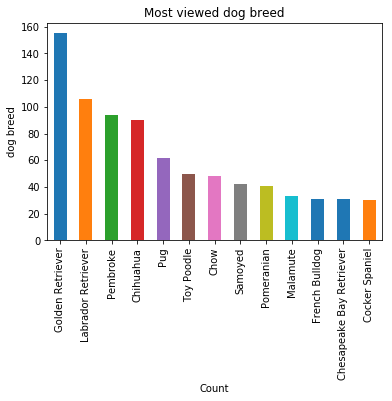

In [89]:
df_dog_breed = T_archive_copy.groupby('dog_breed').filter(lambda x: len(x) >= 25)

df_dog_breed['dog_breed'].value_counts().plot(kind = 'bar')
plt.title('Most viewed dog breed')
plt.xlabel('Count')
plt.ylabel('dog breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

## insight 1
Golden Retriever is the most reviewed dog breed

## visualization 2

In [ ]:
df_stage = T_archive_copy.dog_stage.value_counts

Text(0.5,1,'dog stages')

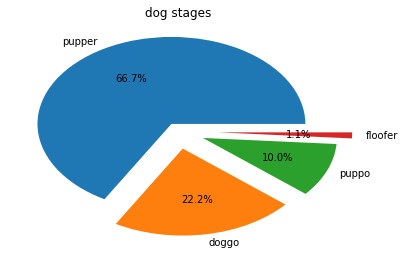

In [73]:
plt.pie(T_archive_copy.dog_stage.value_counts(),
       labels = ['pupper', 'doggo', 'puppo','floofer'],
       autopct = '%1.1f%%',
       explode = (0.1, 0.2, 0.2, 0.3))
plt.title('dog stages')

## insight 2
1- most of the rated dogs are considered to be pupper type

2- the lowest type is floofer

## visualization 3

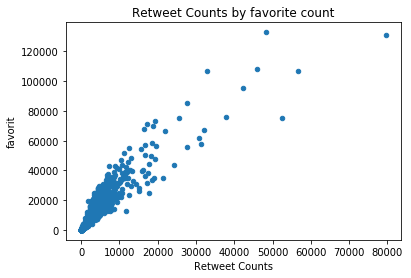

In [86]:
T_archive_copy.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('favorit')
plt.title('Retweet Counts by favorite count')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

## insight 3
they have psotive corelation